In [1]:
#Aula 01 - Oferta 1
#Integrantes:
#Lucas Azarias
#Nathalia Oliveira
#Thiago Alvarenga

from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time

In [14]:
# setup security 
access_token = '1018104656126410757-672tBzDGpZae2MzqKL22A38Ip2M8t8'
access_token_secret = 'pImJyY0lfvbjQ9JUy22aHLvFGVTN8m1nZuXu8pJzvUIeK'
consumer_key = '8r9LG3sU6ck9g2JVCoo5ESm5x'
consumer_secret = 'gJmUq5Mp328eG0dPuD4BXU4iH5j1K1K1u2U2BtK5zAtk7QPdO3'

# setup file store
file = '/Users/NATHALIAF/Desktop/Pós/Recuperacao_Info_Redes_Sociais/Aula01/tweets-sample-3.json'

In [3]:
class MyListener(StreamListener):
        
    
    def __init__(self, file):
        global the_file
        self.the_file = open(file, 'w')
        
    def on_data(self, data):
        self.the_file.write(data)
        return True
    
    def on_error(self, status):
        print(status)
        
    def file_close(self):
        self.the_file.close()        

In [4]:
listener = MyListener(file)
oauth = OAuthHandler(consumer_key, consumer_secret)
oauth.set_access_token(access_token, access_token_secret)

max_time = 90 # in seconds
start_time = time.time() 

## collecting...
stream = Stream(oauth, listener)
#stream.filter(track=['copa', 'neymar', 'messi'],async=True,languages=['pt'])
stream.filter(track=['neymar', 'lukaku', 'messi', 'modric', 'mbappe','pogba','rakitic','cr7','hazard', 'kante', 'kane'],async=True)

elapsed_time = (time.time() - start_time)
while  elapsed_time < max_time:
    elapsed_time = (time.time() - start_time)

    
print('**Finish**')
stream.disconnect()
listener.file_close()

**Finish**


In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
tweets_data = []
tweets_file = open(file, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        

In [7]:
tweets = pd.DataFrame()

tweets['lang'] = ''
tweets['text'] = ''
tweets['country'] = ''
for tweet in tweets_data:
    if 'lang' in tweet:
        tweets.loc[len(tweets)] = [tweet['lang'],
                               tweet['text'],
                               tweet['place']['country'] if tweet['place'] != None else None]
    
print(tweets.head(10))

  lang                                               text country
0   es  RT @A3Noticias: Crean un abecedario con imágen...    None
1   en  RT @PL_PoIIs: Who's better?\n\nRT for Prime Ro...    None
2   en  RT @Ultra_Suristic: Ex-Chelsea Brian Laudrup: ...    None
3   en                     mbappe https://t.co/EUjtAzBB6D    None
4   en  RT @footballitalia: BLOG: #SerieA gets Ronaldo...    None
5   pt  RT @transf_min: 🚨Paul Pogba regressa à Juventu...    None
6   en  RT @PL_PoIIs: Who's better?\n\nRT for Prime Dr...    None
7   en  @trenzarc @OddoiFutureCFC 😂😂😂..he'll be bck up...    None
8   es  RT @infobae: Gustavo Alfaro: "El imprescindibl...    None
9   fr  @predictNwin Belgium vs England🏴󠁧󠁢󠁥󠁮󠁧󠁿\n\n#MAT...    None


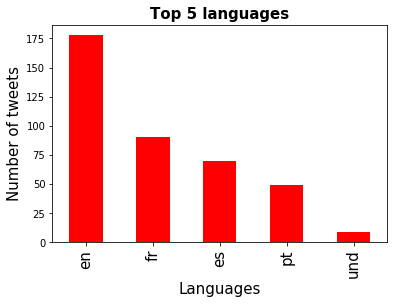

In [8]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

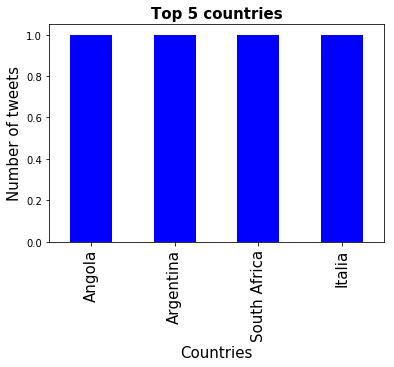

In [9]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [10]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [11]:
## filtrando aqueles q mais foram falados (termos mais influentes)
players = []
for tweet in tweets_data:
    if 'text' in tweet:
        if word_in_text('neymar', tweet['text']):
            players.append('neymar')
        elif word_in_text('messi', tweet['text']):
            players.append('messi')
        elif word_in_text('lukaku', tweet['text']):
            players.append('lukaku')
        elif word_in_text('modric', tweet['text']):
            players.append('modric')
        elif word_in_text('hazard', tweet['text']):
            players.append('hazard')
        elif word_in_text('mbappe', tweet['text']):
            players.append('mbappe')
        elif word_in_text('cr7', tweet['text']):
            players.append('cr7')
        elif word_in_text('pogba', tweet['text']):
            players.append('pogba')
        elif word_in_text('rakitic', tweet['text']):
            players.append('rakitic')
        elif word_in_text('cr7', tweet['text']):
            players.append('cr7')
        elif word_in_text('kante', tweet['text']):
            players.append('kante')
        elif word_in_text('kane', tweet['text']):
            players.append('kane')
        else:
            players.append('None')
tweets['player'] = players
tweets.head(20)

,lang,text,country,player
0,es,RT @A3Noticias: Crean un abecedario con imágen...,None,neymar
1,en,RT @PL_PoIIs: Who's better?\n\nRT for Prime Ro...,None,kane
2,en,RT @Ultra_Suristic: Ex-Chelsea Brian Laudrup: ...,None,hazard
3,en,mbappe https://t.co/EUjtAzBB6D,None,mbappe
4,en,RT @footballitalia: BLOG: #SerieA gets Ronaldo...,None,None
5,pt,RT @transf_min: 🚨Paul Pogba regressa à Juventu...,None,pogba
6,en,RT @PL_PoIIs: Who's better?\n\nRT for Prime Dr...,None,lukaku
7,en,@trenzarc @OddoiFutureCFC 😂😂😂..he'll be bck up...,None,kante
8,es,"RT @infobae: Gustavo Alfaro: ""El imprescindibl...",None,messi
9,fr,@predictNwin Belgium vs England🏴󠁧󠁢󠁥󠁮󠁧󠁿\n\n#MAT...,None,hazard


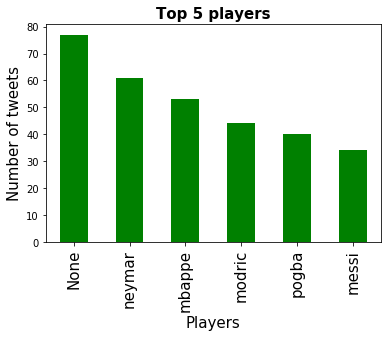

In [16]:
tweets_by_player = tweets['player'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Players', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 players', fontsize=15, fontweight='bold')
tweets_by_player[:6].plot(ax=ax, kind='bar', color='green')

In [31]:
## Desafio: filtrando pelas coordenadas geográficas os tweets em português
tweets_data_c = []
tweets_file_c = open(file, "r")
for line in tweets_file_c:
    try:
        tweet_c = json.loads(line)
        tweets_data_c.append(tweet_c)
    except:
        continue



tweets_c = pd.DataFrame()

tweets_c['lang'] = ''
tweets_c['text'] = ''
tweets_c['coordinates'] = ''
tweets_c['country'] = ''
for tweet_c in tweets_data_c:
    if 'coordinates' in tweet_c:
        tweets_c.loc[len(tweets_c)] = [tweet_c['lang'],
                               tweet_c['text'],
                               tweet_c['coordinates'],
                               tweet_c['place']['country'] if tweet_c['place'] != None else None]
                           

tweets_c

,lang,text,coordinates,country
0,es,RT @A3Noticias: Crean un abecedario con imágen...,None,None
1,en,RT @PL_PoIIs: Who's better?\n\nRT for Prime Ro...,None,None
2,en,RT @Ultra_Suristic: Ex-Chelsea Brian Laudrup: ...,None,None
3,en,mbappe https://t.co/EUjtAzBB6D,None,None
4,en,RT @footballitalia: BLOG: #SerieA gets Ronaldo...,None,None
5,pt,RT @transf_min: 🚨Paul Pogba regressa à Juventu...,None,None
6,en,RT @PL_PoIIs: Who's better?\n\nRT for Prime Dr...,None,None
7,en,@trenzarc @OddoiFutureCFC 😂😂😂..he'll be bck up...,None,None
8,es,"RT @infobae: Gustavo Alfaro: ""El imprescindibl...",None,None
9,fr,@predictNwin Belgium vs England🏴󠁧󠁢󠁥󠁮󠁧󠁿\n\n#MAT...,None,None
